In [10]:
#%pip install matplotlib
import os
import nltk
import random
import pickle
import matplotlib.pyplot as plt
from nltk.corpus import reuters
from nltk.probability import FreqDist
from collections import Counter


download = True

#load or process freq_dist
try:
    #load freq_dist from the file
    with open('freq_dist.pkl', 'rb') as f:
        freq_dist = pickle.load(f)
        print("Freq dist loaded from freq_dist.pkl")

#else download it if you want
except:
    if download:
        #just use the reuters dataset
        nltk.download('reuters')

        #load the corpus
        raw_words = reuters.words()

        #remove punctuation, make words lowercase 
        words = [word.lower() for word in raw_words if word.isalpha()]

        #calculate term freqs
        freq_dist = FreqDist(words)

        #save freq_dist to a file
        with open('freq_dist.pkl', 'wb') as f:
            pickle.dump(freq_dist, f)
        print("Freq dist saved to freq_dist.pkl")



Freq dist loaded from freq_dist.pkl


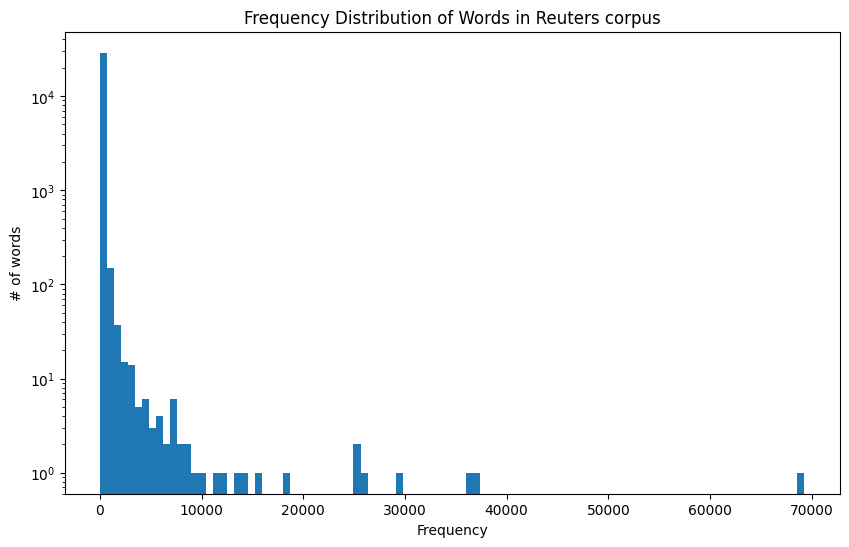

In [11]:
#plot it to view overall distribution
frequencies = [freq_dist[word] for word in freq_dist]
plt.figure(figsize=(10, 6))
plt.hist(frequencies, bins=100, log=True)  # Using logarithmic scale for better visualization
plt.title('Frequency Distribution of Words in Reuters corpus')
plt.xlabel('Frequency')
plt.ylabel('# of words')
plt.show()

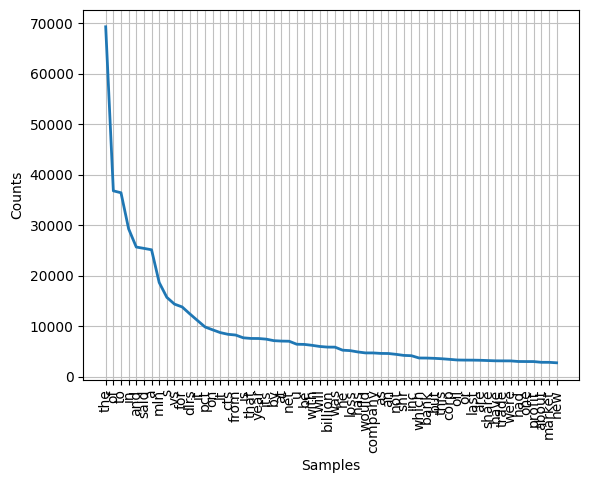

<Axes: xlabel='Samples', ylabel='Counts'>

In [5]:
# Plot the frequency of the 40 most common words
freq_dist.plot(60, cumulative=False)



In [6]:
#generates a document with a random length 
def generate_random_length_document(min_length, max_length, term_frequencies):
    length = random.randint(min_length, max_length)
    words = list(term_frequencies.keys())
    frequencies = [term_frequencies[word] for word in words]
    return ' '.join(random.choices(words, weights=frequencies, k=length))



In [7]:
#generates documents with random lengths using term frequencies from above
min_words = 500
max_words = 10000
documents = [generate_random_length_document(100, 10000, freq_dist) for _ in range(100)]

#create output subfolder if it doesn't exist
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

#save each doc to a file, text for now
for i, doc in enumerate(documents, start=1):
    filename = os.path.join(output_folder, f'doc{i}_{min_words}to{max_words}.txt')
    with open(filename, 'w') as file:
        file.write(doc)

In [22]:

#assign a unique number to each word
word_numbers = {word: i+1 for i, word in enumerate(freq_dist.keys())}

#function to generate a document as a frequency distribution
def generate_document(min_length, max_length, term_frequencies):
    length = random.randint(min_length, max_length)
    document_words = [random.choices(list(term_frequencies.keys()), weights=list(term_frequencies.values()), k=length)]
    return Counter(document_words[0])  # Returns a Counter object with word frequencies

#generate 100 documents
min_words = 100
max_words = 10000
documents = [generate_document(min_words, max_words, freq_dist) for _ in range(5000)]

#create output subfolder if it doesn't exist
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

#collect triples in list
triples = []
for doc_id, doc in enumerate(documents, start=1):
    for word, freq in doc.items():
        word_num = word_numbers[word]
        triples.append((word_num, doc_id, freq))

#randomize the order of the triples
random.shuffle(triples)

output_file = os.path.join(output_folder, 'term_doc_freq_5000.txt')

#save all randomized triples in one file
with open(output_file, 'w') as file:
    for triple in triples:
        file.write(f'{triple[0]},{triple[1]},{triple[2]}\n')